# LOFAR conversion guide

In [1]:
from importlib.metadata import version
import os

try:
    import xradio

    print("XRADIO version", version("xradio"), "already installed.")
except ImportError as e:
    print(e)
    print("Installing XRADIO")

    os.system("pip install xradio")

    import xradio

    print("xradio version", version("xradio"), " installed.")

XRADIO version 0.0.49 already installed.


## Download dataset

In [2]:
import toolviper

toolviper.utils.data.download(file="small_lofar.ms")

[2025-04-07 11:04:24,411]  WARNING   toolviper:  File exists: /home/fedemp/ws_xradio_dev/venv_xradio_python312/lib/python3.12/site-packages/toolviper/utils/data/.dropbox 
[2025-04-07 11:04:24,412]     INFO   toolviper:  Updating file metadata information ...  
 

 Download List   
 ──────────────── 
  small_lofar.ms

small_lofar.ms.zip:   0%|          | 0.00/9.62M [00:00<?, ?iB/s]

## Convert to Processing Set

In [3]:
from xradio.measurement_set import convert_msv2_to_processing_set

ms_file = "small_lofar.ms"
main_chunksize = {"frequency": 1, "time": 20}  # baseline, polarization
outfile = "small_lofar.ps.zarr"
convert_msv2_to_processing_set(
    in_file=ms_file,
    out_file=outfile,
    parallel_mode="none",
    overwrite=True,
    main_chunksize=main_chunksize,
)

Output file:  small_lofar.ps.zarr
[2025-04-07 11:04:30,823]     INFO   toolviper:  Partition scheme that will be used: ['DATA_DESC_ID', 'OBS_MODE', 'OBSERVATION_ID', 'FIELD_ID'] 
[2025-04-07 11:04:30,831]     INFO   toolviper:  Number of partitions: 1 
[2025-04-07 11:04:30,832]     INFO   toolviper:  OBSERVATION_ID [0], DDI [0], STATE [0], FIELD [0], SCAN [0] 
[2025-04-07 11:04:31,102]  WARNING   toolviper:  Source_id is -1. No source information will be included in the field_and_source_xds. 


## Processing Set

In [4]:
from xradio.measurement_set import open_processing_set

ps_xdt = open_processing_set(ps_store=outfile)
ps_xdt.xr_ps.summary()

,name,intents,shape,polarization,scan_name,spw_name,field_name,source_name,line_name,field_coords,start_frequency,end_frequency
0,small_lofar_0,[],"(5, 2775, 15, 4)","[XX, XY, YX, YY]",[0],SB-349_0,[BEAM_4_0],[Unknown],[],"[fk5, 14h00m00.00s, 86d00m00.00s]",1.270615e+08,1.272324e+08


In [5]:
ms_xdt = ps_xdt["small_lofar_0"]
ms_xdt

<xarray.DataTree 'small_lofar_0'>
Group: /small_lofar_0
│   Dimensions:                     (time: 5, baseline_id: 2775, frequency: 15,
│                                    polarization: 4, uvw_label: 3)
│   Coordinates:
│       baseline_antenna1_name      (baseline_id) <U9 100kB ...
│       baseline_antenna2_name      (baseline_id) <U9 100kB ...
│     * baseline_id                 (baseline_id) int64 22kB 0 1 2 ... 2773 2774
│       field_name                  (time) <U28 560B ...
│     * frequency                   (frequency) float64 120B 1.271e+08 ... 1.272e+08
│     * polarization                (polarization) <U2 32B 'XX' 'XY' 'YX' 'YY'
│       scan_name                   (time) <U21 420B '0' '0' '0' '0' '0'
│     * time                        (time) float64 40B 1.52e+09 ... 1.52e+09
│     * uvw_label                   (uvw_label) <U1 12B 'u' 'v' 'w'
│   Data variables:
│       EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 111kB ...
│       FLAG                        (time, baseline_id, frequency, polarization) bool 832kB ...
│       TIME_CENTROID               (time, baseline_id) float64 111kB ...
│       UVW                         (time, baseline_id, uvw_label) float64 333kB ...
│       VISIBILITY                  (time, baseline_id, frequency, polarization) complex64 7MB ...
│       WEIGHT                      (time, baseline_id, frequency, polarization) float32 3MB ...
│   Attributes:
│       creation_date:     2025-04-07T09:04:30.879043+00:00
│       creator:           {'software_name': 'xradio', 'version': '0.0.49'}
│       data_groups:       {'base': {'correlated_data': 'VISIBILITY', 'date': '20...
│       observation_info:  {'intents': [''], 'observer': ['unknown'], 'project': ...
│       processor_info:    {'sub_type': 'LOFAR-COBALT', 'type': 'CORRELATOR'}
│       schema_version:    4.0.-9988
│       type:              visibility
├── Group: /small_lofar_0/antenna_xds
│       Dimensions:                 (antenna_name: 74, cartesian_pos_label: 3,
│                                    receptor_label: 2)
│       Coordinates:
│         * antenna_name            (antenna_name) <U9 3kB 'CS001HBA0' ... 'IE613HBA'
│         * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
│           mount                   (antenna_name) <U6 2kB ...
│           polarization_type       (antenna_name, receptor_label) <U1 592B ...
│         * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
│           station                 (antenna_name) <U5 1kB ...
│           telescope_name          (antenna_name) <U5 1kB ...
│       Data variables:
│           ANTENNA_DISH_DIAMETER   (antenna_name) float64 592B ...
│           ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 2kB ...
│           ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 1kB ...
│       Attributes:
│           overall_telescope_name:  LOFAR
│           relocatable_antennas:    False
│           type:                    antenna
├── Group: /small_lofar_0/field_and_source_xds_base
│       Dimensions:             (field_name: 1, sky_dir_label: 2)
│       Coordinates:
│         * field_name          (field_name) <U28 112B 'BEAM_4_0'
│         * sky_dir_label       (sky_dir_label) <U3 24B 'ra' 'dec'
│           source_name         (field_name) <U7 28B 'Unknown'
│       Data variables:
│           FIELD_PHASE_CENTER  (field_name, sky_dir_label) float64 16B -2.618 1.501
│       Attributes:
│           type:     field_and_source
└── Group: /small_lofar_0/pointing_xds
        Dimensions:              (time_pointing: 1, antenna_name: 74,
                                  local_sky_dir_label: 2)
        Coordinates:
          * antenna_name         (antenna_name) <U9 3kB 'CS001HBA0' ... 'IE613HBA'
          * local_sky_dir_label  (local_sky_dir_label) <U3 24B 'az' 'alt'
          * time_pointing        (time_pointing) float64 8B 5.027e+09
        Data variables:
            POINTING_BEAM        (time_pointing, an

In [6]:
ms_xdt.xr_ms.get_field_and_source_xds()

<xarray.DatasetView> Size: 23kB
Dimensions:             (field_name: 1, sky_dir_label: 2, baseline_id: 2775,
                         frequency: 15, polarization: 4, time: 5, uvw_label: 3)
Coordinates:
  * baseline_id         (baseline_id) int64 22kB 0 1 2 3 ... 2771 2772 2773 2774
  * frequency           (frequency) float64 120B 1.271e+08 ... 1.272e+08
  * polarization        (polarization) <U2 32B 'XX' 'XY' 'YX' 'YY'
  * time                (time) float64 40B 1.52e+09 1.52e+09 ... 1.52e+09
  * uvw_label           (uvw_label) <U1 12B 'u' 'v' 'w'
  * field_name          (field_name) <U28 112B 'BEAM_4_0'
  * sky_dir_label       (sky_dir_label) <U3 24B 'ra' 'dec'
    source_name         (field_name) <U7 28B 'Unknown'
Data variables:
    FIELD_PHASE_CENTER  (field_name, sky_dir_label) float64 16B -2.618 1.501
Attributes:
    type:     field_and_source

In [7]:
ms_xdt.antenna_xds

<xarray.DataTree 'antenna_xds'>
Group: /small_lofar_0/antenna_xds
    Dimensions:                 (time: 5, baseline_id: 2775, frequency: 15,
                                 polarization: 4, uvw_label: 3, antenna_name: 74,
                                 cartesian_pos_label: 3, receptor_label: 2)
    Coordinates:
      * antenna_name            (antenna_name) <U9 3kB 'CS001HBA0' ... 'IE613HBA'
      * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
        mount                   (antenna_name) <U6 2kB ...
        polarization_type       (antenna_name, receptor_label) <U1 592B ...
      * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
        station                 (antenna_name) <U5 1kB ...
        telescope_name          (antenna_name) <U5 1kB ...
    Inherited coordinates:
      * baseline_id             (baseline_id) int64 22kB 0 1 2 3 ... 2772 2773 2774
      * frequency               (frequency) float64 120B 1.271e+08 ... 1.272e+08
      * polarization            (polarization) <U2 32B 'XX' 'XY' 'YX' 'YY'
      * time                    (time) float64 40B 1.52e+09 1.52e+09 ... 1.52e+09
      * uvw_label               (uvw_label) <U1 12B 'u' 'v' 'w'
    Data variables:
        ANTENNA_DISH_DIAMETER   (antenna_name) float64 592B ...
        ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 2kB ...
        ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 1kB ...
    Attributes:
        overall_telescope_name:  LOFAR
        relocatable_antennas:    False
        type:                    antenna

In [13]:
ms_xdt.pointing_xds

<xarray.DataTree 'pointing_xds'>
Group: /small_lofar_0/pointing_xds
    Dimensions:              (time: 5, baseline_id: 2775, frequency: 15,
                              polarization: 4, uvw_label: 3, time_pointing: 1,
                              antenna_name: 74, local_sky_dir_label: 2)
    Coordinates:
      * antenna_name         (antenna_name) <U9 3kB 'CS001HBA0' ... 'IE613HBA'
      * local_sky_dir_label  (local_sky_dir_label) <U3 24B 'az' 'alt'
      * time_pointing        (time_pointing) float64 8B 5.027e+09
    Inherited coordinates:
      * baseline_id          (baseline_id) int64 22kB 0 1 2 3 ... 2772 2773 2774
      * frequency            (frequency) float64 120B 1.271e+08 ... 1.272e+08
      * polarization         (polarization) <U2 32B 'XX' 'XY' 'YX' 'YY'
      * time                 (time) float64 40B 1.52e+09 1.52e+09 ... 1.52e+09
      * uvw_label            (uvw_label) <U1 12B 'u' 'v' 'w'
    Data variables:
        POINTING_BEAM        (time_pointing, antenna_name, local_sky_dir_label) float64 1kB ...
    Attributes:
        type:     pointing

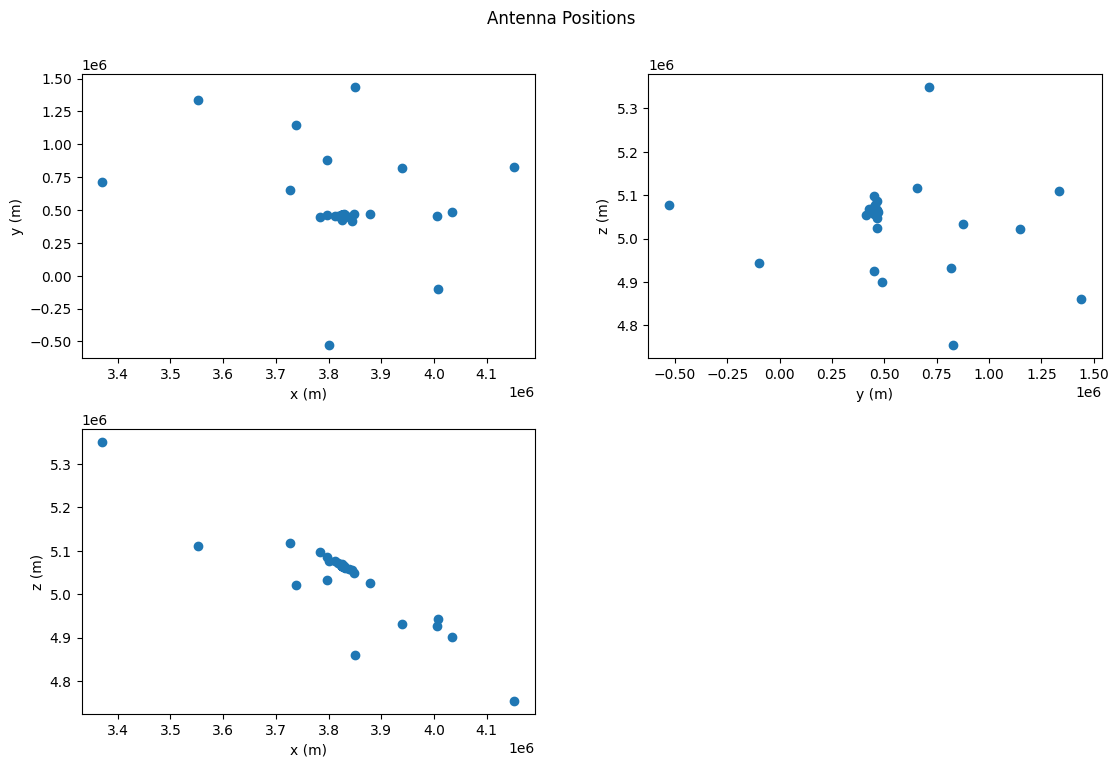

In [11]:
ps_xdt.xr_ps.plot_antenna_positions(label_all_antennas=False)

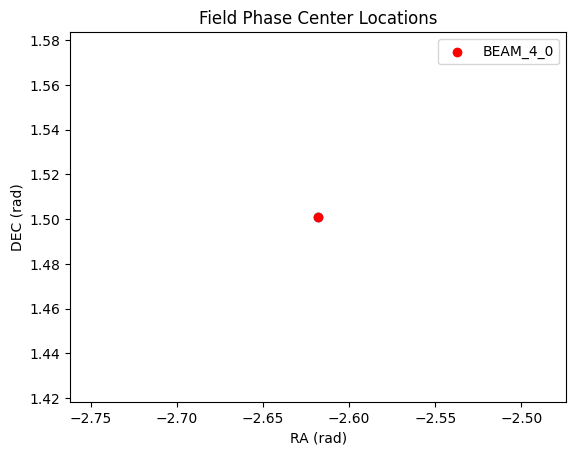

In [9]:
ps_xdt.xr_ps.plot_phase_centers()